# Coding and Stats instruments

# Numpy

In [3]:
import numpy as np

#------------------ Generate random numbers
np.random.seed(404)
y = np.random.random(5) # 5 random draws

rng = np.random.default_rng(404) #set seed
x = rng.random(5) # 5 random draws

#---------------- Concatenate in couples
couples = np.vstack((x,y)).T

#----------------- Sort an array by coloumn or row
couples = couples[couples[:,0].argsort(), :]





---

# Plotting

### Pylab instructions

In [ ]:
import pylab as plt

#-------  Plt params  ----------------
%config InlineBackend.figure_format='retina'
plt.rc('figure', figsize=(7, 4), dpi=120)
plt.rcParams.update({'font.size': 9})
#--------------------------------------------

# Subplots examples
fig, ax = plt.subplots(1,1) 

fig = plt.figure()
ax0 = fig.add_subplot(221)

# Plot settings
ax.set_xlim(0.0, 1.0)
ax.set_xscale('log')

ax.legend()

ax.axhline(res, color='k',lw=1, ls='-', label = 'True value' )
ax.axvline(10, c='red')

# Plot Cosmetics
ax.set_xlabel('time')
ax.grid(True, which ='both', linestyle='--')
ax.set_title('title')

# Switch for plotting
if True:
    ax[0].plot(x, y, color='black', label=r"$h(x)$, Generating Distribution")

# Mpl settings for more complex plots
plt.tight_layout()
fig.patch.set_facecolor('w')

# Embedding Image in MD cell
<img src="img/L03_percentiles.png" width="500">

### Example using GridSpec

Mean kinetic energy value =  0.014639947139687103
Mean total energy value =  -0.014664132154579502
Mean potential energy value =  -0.029304079294266604


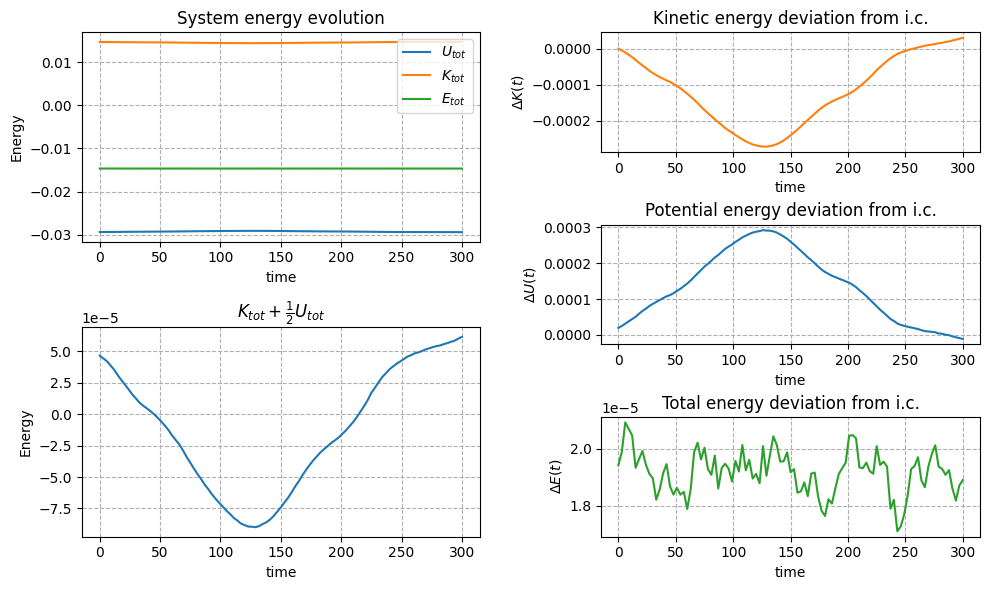

In [ ]:
######################################################### Plotting results
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

ax1.plot(t[:], u_tot[:], label=r"$U_{tot}$")
ax1.plot(t[:], k_tot[:], label=r'$K_{tot}$')
ax1.plot(t[:], e_tot[:], label=r'$E_{tot}$')
ax1.set_xlabel(r'time')
ax1.set_ylabel(r'Energy')
ax1.legend()
ax1.grid(True, which ='both', linestyle='--')
ax1.set_title('System energy evolution')

ax2.plot(t[:], k_tot[:]+0.5*u_tot[:])
ax2.set_xlabel(r'time')
ax2.set_ylabel(r'Energy')
ax2.grid(True, which ='both', linestyle='--')
ax2.set_title(r"$K_{tot} + \frac{1}{2} U_{tot}$")

gs2 = gridspec.GridSpec(3, 1)

ax = fig.add_subplot(gs2[0])
#ax.plot(t[:], (k_tot[:]-1.4810124806684295)/1.4810124806684295, color='#ff7f0e')
ax.plot(t[:], (k_tot[:]-0.014756831774854977), color='#ff7f0e')
ax.set_xlabel(r'time')
ax.set_ylabel(r'$\Delta K(t)$')
ax.grid(True, which ='both', linestyle='--')
ax.set_title('Kinetic energy deviation from i.c.')

ax = fig.add_subplot(gs2[1])
#ax.plot(t[:], (u_tot[:]+2.944400351517177)/(-2.944400351517177), color='#1f77b4')
ax.plot(t[:], (u_tot[:]+0.029440129070145562), color='#1f77b4')
ax.set_xlabel(r'time')
ax.set_ylabel(r'$\Delta U(t)$')
ax.grid(True, which ='both', linestyle='--')
ax.set_title('Potential energy deviation from i.c.')

ax = fig.add_subplot(gs2[2])
#ax.plot(t[:], (e_tot[:]+1.4633878708487476)/(-1.4633878708487476), color='#2ca02c')
ax.plot(t[:], (e_tot[:]+0.014683297295290585), color='#2ca02c')
ax.set_xlabel(r'time')
ax.set_ylabel(r'$\Delta E(t)$')
ax.grid(True, which ='both', linestyle='--')
ax.set_title('Total energy deviation from i.c.')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom),
                            0.5, 1 - (gs1.top-top)])
gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom),
                            None, 1 - (gs2.top-top)],
                 h_pad=0.5)
plt.show()

### Corner plots

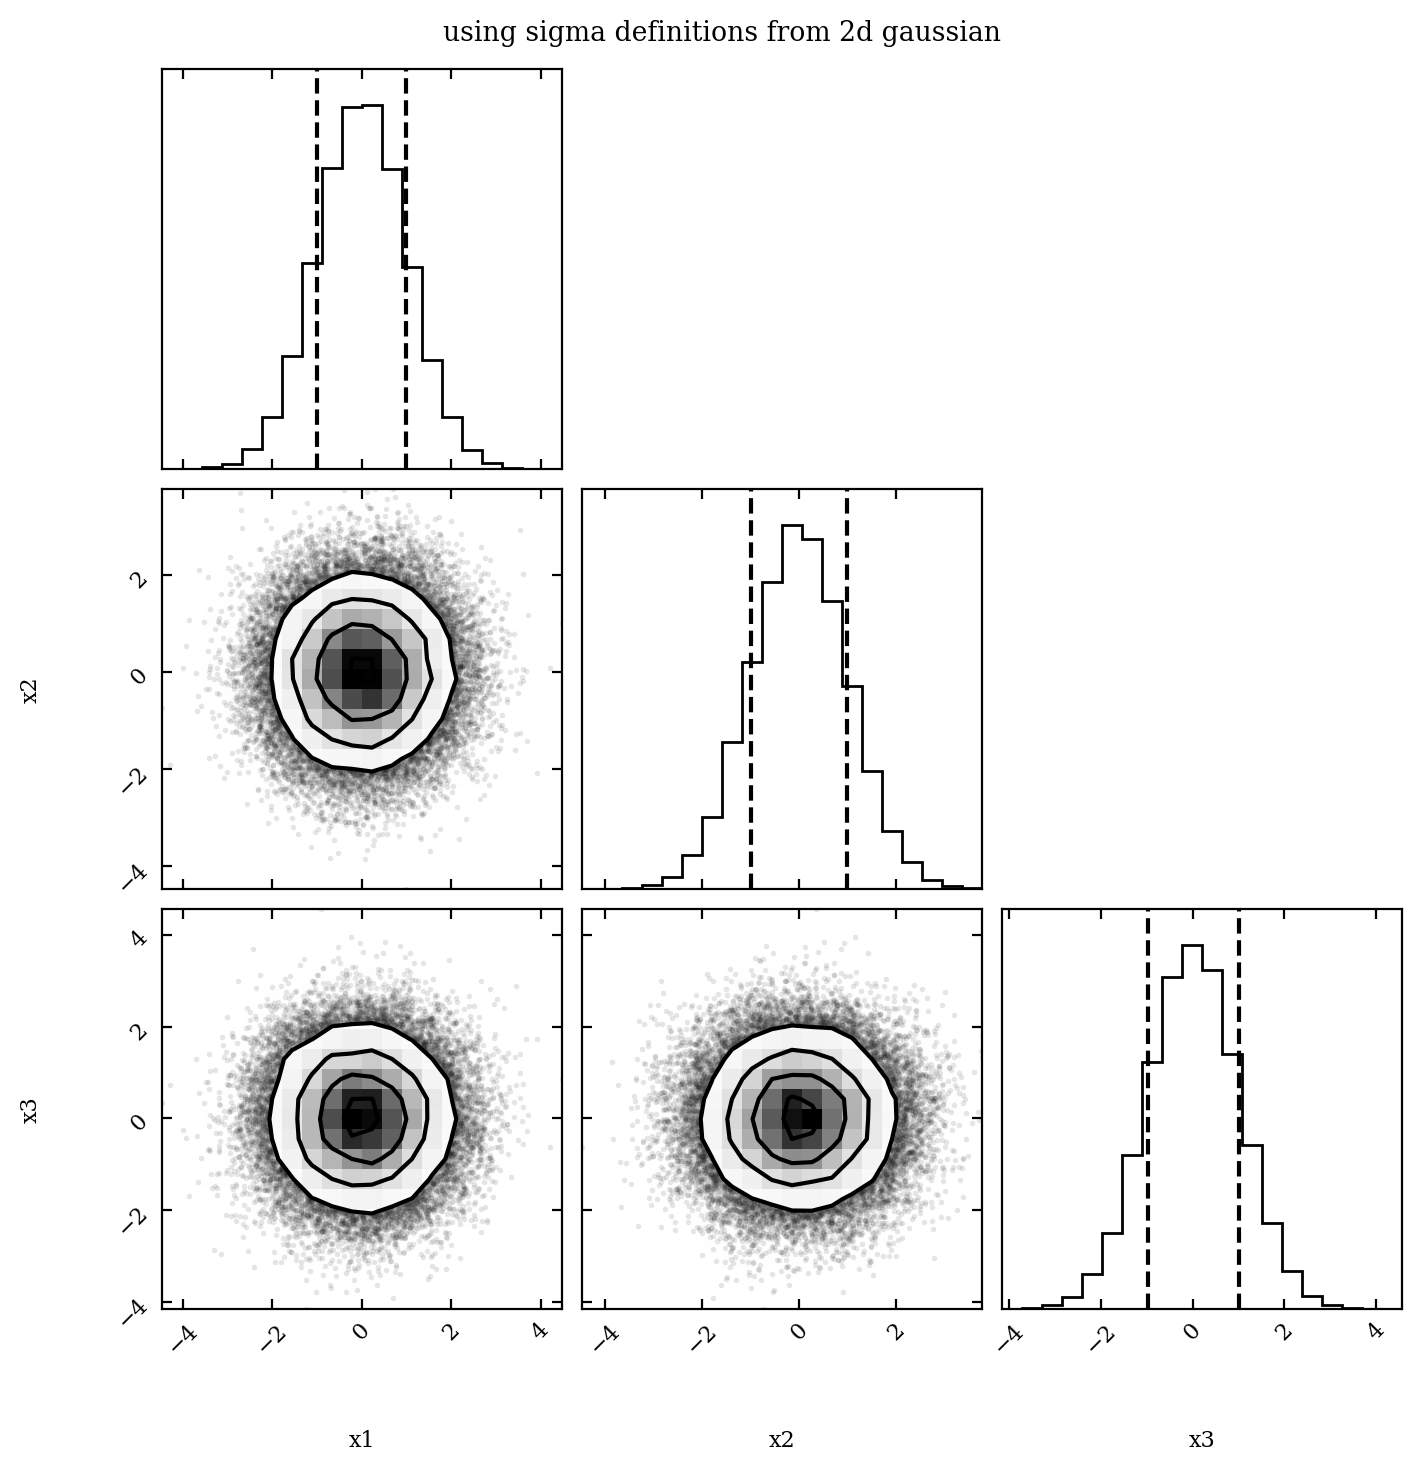

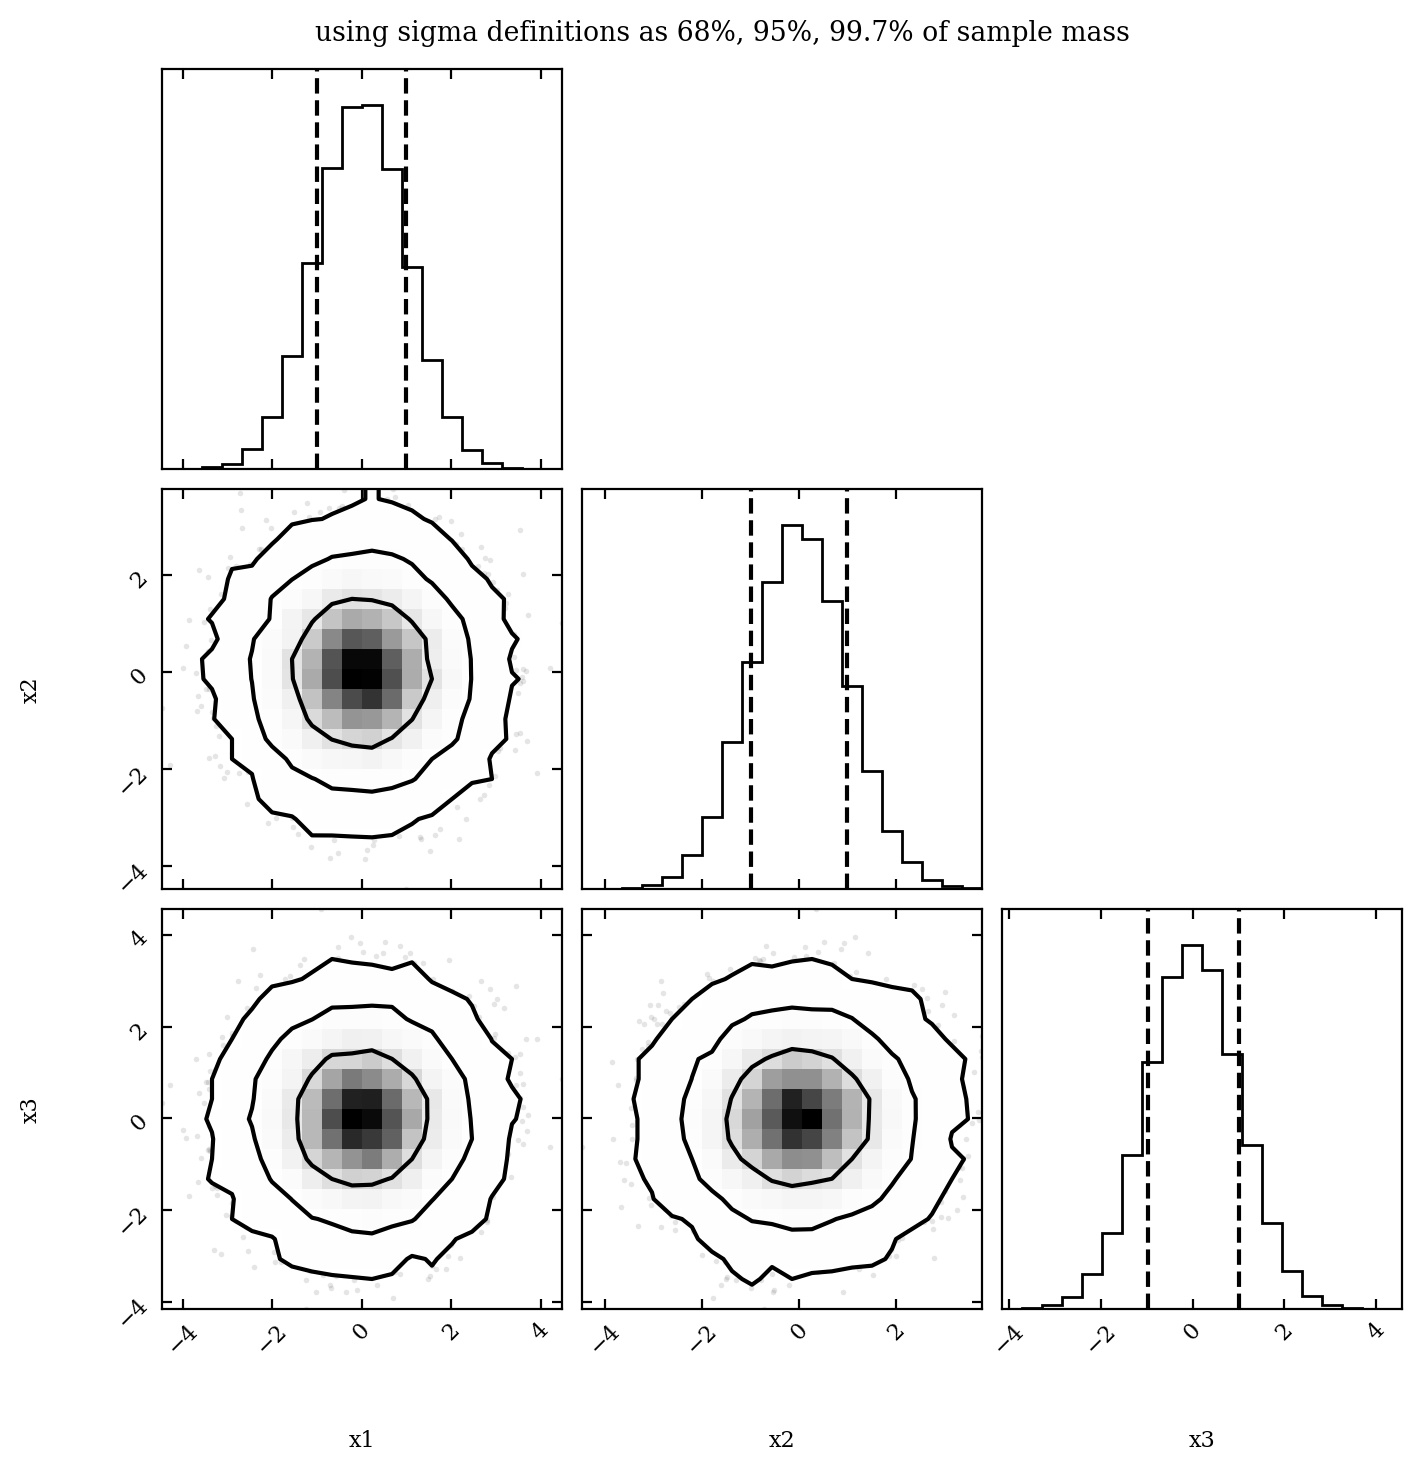

In [ ]:
import corner

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 3)

# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions from 2d gaussian")
fig.patch.set_facecolor('w')

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.997), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions as 68%, 95%, 99.7% of sample mass")
fig.patch.set_facecolor('w')

---

# Scipy

In [ ]:
import scipy.stats

distG = scipy.stats.norm(loc=mu, scale=sigma_h) # Create distribution object
distG.pdf() # Distribution function
distG.cdf() # Cumulative function
distG.rvs() # Generate a random number using the distribution

---

# Miscellanea

In [ ]:
#####################################################################
# Using lambda funciton to fix variables of a function:
#####################################################################

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, data, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

In [ ]:
#####################################################################
# Pickle results of a function
#####################################################################

from astroML.utils.decorators import pickle_results

@pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results

In [ ]:
#####################################################################
# Text strings using variables values
#####################################################################

print('Results: \n \
    Log of mean: %.2f   \n \
    Mean of log: %.2f   \n \
    Log of median: %.2f   \n \
    Median of log: %.2f ' %(log_mean_x, mean_y, log_median_x, median_y))

label=f'Gaussian, $\sigma$ = {std_dev[3]:.3}'

In [ ]:
#####################################################################
# Information about cycle status
#####################################################################

from tqdm import tqdm

for N in tqdm(Nvals):
    blabla

In [ ]:
######################################################################
# Open pages using default web browser
######################################################################

import webbrowser

url = 'https://docs.python.org/'
webbrowser.open_new_tab(url)